## Solving the LINE problem with a single perceptron

In [6]:
# imports

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device = "cuda" if torch.cuda.is_available() else "cpu"

In [7]:
# line equation: y = w*x + c
w = 3
c = 5
X = torch.FloatTensor(
    [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]]
).to(device)
Y = torch.FloatTensor([[w * x + c] for x in range(12)]).to(device)
# Y = torch.FloatTensor([[5], [8], [11], [14], [17], [20], [23], [26], [29], [32], [35], [38]]).to(device) # 3x+5

In [8]:
# Perceptron model
model = nn.Sequential(
    nn.Linear(1, 1, bias=True),
).to(device)

nn.Linear = Applies a linear transformation to the incoming data: Y = w*X^T+b

References:

https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

In [9]:
print("Starting weights: {}".format(model[0].weight))
print("Starting bias: {}".format(model[0].bias))

Starting weights: Parameter containing:
tensor([[-0.0847]], requires_grad=True)
Starting bias: Parameter containing:
tensor([0.0938], requires_grad=True)


#### loss and optimizer
loss: loss function is a method of evaluating how well your machine learning algorithm models your featured data set.

optimizer: optimizers are algorithms or methods used to change the parameters of your neural network such as weights and learning rate in order to reduce the loss.

MSELoss: $\frac{1}{n}\sum (y - \hat{y})^2$

In [10]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [11]:
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 591.7714233398438
step: 200  loss: 0.5956520438194275
step: 400  loss: 0.06411401927471161
step: 600  loss: 0.006900938227772713
step: 800  loss: 0.0007428228855133057
step: 1000  loss: 7.994820771273226e-05
step: 1200  loss: 8.610940312792081e-06
step: 1400  loss: 9.256872885998746e-07
step: 1600  loss: 1.0014628060162067e-07
step: 1800  loss: 1.089832313283523e-08
step: 2000  loss: 1.2727620068986312e-09
step: 2200  loss: 5.492021837305572e-10
step: 2400  loss: 5.492021837305572e-10
step: 2600  loss: 5.492021837305572e-10
step: 2800  loss: 5.492021837305572e-10
step: 3000  loss: 5.492021837305572e-10
step: 3200  loss: 5.492021837305572e-10
step: 3400  loss: 5.492021837305572e-10
step: 3600  loss: 5.492021837305572e-10
step: 3800  loss: 5.492021837305572e-10
step: 4000  loss: 5.492021837305572e-10
step: 4200  loss: 5.492021837305572e-10
step: 4400  loss: 5.492021837305572e-10
step: 4600  loss: 5.492021837305572e-10
step: 4800  loss: 5.492021837305572e-10


In [12]:
pred = model(X)
print(pred)

tensor([[ 5.0000],
        [ 8.0000],
        [11.0000],
        [14.0000],
        [17.0000],
        [20.0000],
        [23.0000],
        [26.0000],
        [29.0000],
        [32.0000],
        [35.0000],
        [38.0000]], grad_fn=<AddmmBackward0>)


In [13]:
new_value = torch.FloatTensor([[12]]).to(device)
new_pred = model(new_value)
print(new_pred)

tensor([[41.0000]], grad_fn=<AddmmBackward0>)


In [14]:
print("Learned weights: {}".format(model[0].weight))
print("Learned bias: {}".format(model[0].bias))

Learned weights: Parameter containing:
tensor([[3.0000]], requires_grad=True)
Learned bias: Parameter containing:
tensor([5.0000], requires_grad=True)


## Solving OR problem with a single perceptron

| x1 | x2 | y |
|:--:|:--:|:-:|
|  0 |  0 | 0 |
|  0 |  1 | 1 |
|  1 |  0 | 1 |
|  1 |  1 | 1 |

In [15]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [1]]).to(device)

In [16]:
model = nn.Sequential(nn.Linear(2, 1, bias=True), nn.Sigmoid()).to(device)

nn.Sigmoid: Applies the element-wise sigmoid function

<img src="https://pytorch.org/docs/stable/_images/Sigmoid.png">

References:

https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html

In [17]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

detach() method in PyTorch is used to separate a tensor from the computational graph by returning a new tensor that doesn't require a gradient

In [18]:
losses = []
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)
    losses.append(loss.cpu().detach().numpy())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 0.27716168761253357
step: 200  loss: 0.13419890403747559
step: 400  loss: 0.09554823487997055
step: 600  loss: 0.07027576863765717
step: 800  loss: 0.05406546592712402
step: 1000  loss: 0.04316125065088272
step: 1200  loss: 0.035481590777635574
step: 1400  loss: 0.029862724244594574
step: 1600  loss: 0.025619126856327057
step: 1800  loss: 0.022327441722154617
step: 2000  loss: 0.019715631380677223
step: 2200  loss: 0.01760271191596985
step: 2400  loss: 0.015864599496126175
step: 2600  loss: 0.014413982629776001
step: 2800  loss: 0.013187849894165993
step: 3000  loss: 0.012139886617660522
step: 3200  loss: 0.011235333979129791
step: 3400  loss: 0.010447720997035503
step: 3600  loss: 0.009756513871252537
step: 3800  loss: 0.00914565660059452
step: 4000  loss: 0.00860233511775732
step: 4200  loss: 0.008116321638226509
step: 4400  loss: 0.007679269183427095
step: 4600  loss: 0.007284358609467745
step: 4800  loss: 0.0069259474985301495


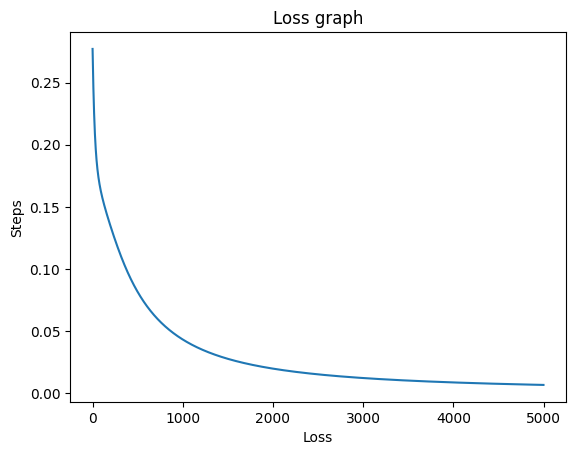

In [19]:
import matplotlib.pyplot as plt

plt.plot(list(range(5000)), losses)
plt.title("Loss graph")
plt.xlabel("Loss")
plt.ylabel("Steps")
plt.show()

In [20]:
pred = model(X)
print(pred)

tensor([[0.1227],
        [0.9248],
        [0.9247],
        [0.9991]], grad_fn=<SigmoidBackward0>)


Thresholding to obtain the 0 or 1 as final output

In [21]:
out = 1 * (pred >= 0.5)
print(out)

tensor([[0],
        [1],
        [1],
        [1]])


## Solving AND problem with a single perceptron

| x1 | x2 | y |
|:--:|:--:|:-:|
|  0 |  0 | 0 |
|  0 |  1 | 0 |
|  1 |  0 | 0 |
|  1 |  1 | 1 |

In [22]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [0], [0], [1]]).to(device)

In [23]:
# Perceptron model
model = nn.Sequential(nn.Linear(2, 1, bias=True), nn.Sigmoid()).to(device)

In [24]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [25]:
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 0.25653108954429626
step: 200  loss: 0.13757610321044922
step: 400  loss: 0.10198543965816498
step: 600  loss: 0.08134676516056061
step: 800  loss: 0.06758159399032593
step: 1000  loss: 0.05760449171066284
step: 1200  loss: 0.050001829862594604
step: 1400  loss: 0.04401392489671707
step: 1600  loss: 0.03918379917740822
step: 1800  loss: 0.03521473705768585
step: 2000  loss: 0.031903669238090515
step: 2200  loss: 0.029106147587299347
step: 2400  loss: 0.026716485619544983
step: 2600  loss: 0.0246555358171463
step: 2800  loss: 0.022862877696752548
step: 3000  loss: 0.021291635930538177
step: 3200  loss: 0.019905030727386475
step: 3400  loss: 0.018673717975616455
step: 3600  loss: 0.017574124038219452
step: 3800  loss: 0.01658707857131958
step: 4000  loss: 0.01569683849811554
step: 4200  loss: 0.014890419319272041
step: 4400  loss: 0.014156978577375412
step: 4600  loss: 0.01348742377012968
step: 4800  loss: 0.012874063104391098


In [26]:
pred = model(X)
print(pred)

tensor([[0.0031],
        [0.1196],
        [0.1196],
        [0.8564]], grad_fn=<SigmoidBackward0>)


In [27]:
out = 1 * (pred >= 0.5)
print(out)

tensor([[0],
        [0],
        [0],
        [1]])


## Solving XOR problem with a single perceptron

| x1 | x2 | y |
|:--:|:--:|:-:|
|  0 |  0 | 0 |
|  0 |  1 | 1 |
|  1 |  0 | 1 |
|  1 |  1 | 0 |

In [28]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [29]:
# Perceptron model
model = nn.Sequential(nn.Linear(2, 1, bias=True), nn.Sigmoid()).to(device)

In [30]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [31]:
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 0.25591152906417847
step: 200  loss: 0.252138614654541
step: 400  loss: 0.25082147121429443
step: 600  loss: 0.25033384561538696
step: 800  loss: 0.250141441822052
step: 1000  loss: 0.25006160140037537
step: 1200  loss: 0.25002726912498474
step: 1400  loss: 0.25001221895217896
step: 1600  loss: 0.2500055134296417
step: 1800  loss: 0.2500024735927582
step: 2000  loss: 0.25000113248825073
step: 2200  loss: 0.250000536441803
step: 2400  loss: 0.2500002384185791
step: 2600  loss: 0.25000011920928955
step: 2800  loss: 0.2500000596046448
step: 3000  loss: 0.25
step: 3200  loss: 0.25
step: 3400  loss: 0.2499999850988388
step: 3600  loss: 0.2499999850988388
step: 3800  loss: 0.25
step: 4000  loss: 0.25
step: 4200  loss: 0.25
step: 4400  loss: 0.25
step: 4600  loss: 0.25
step: 4800  loss: 0.2499999850988388


In [32]:
pred = model(X)
print(pred)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [33]:
# Perceptron model
model = nn.Sequential(
    nn.Linear(2, 2, bias=True),
    nn.Sigmoid(),
    nn.Linear(2, 1, bias=True),
).to(device)

In [34]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [35]:
for step in range(5000):
    pred = model(X)
    loss = criterion(pred, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 200 == 0:
        print("step:", step, " loss:", loss.item())

step: 0  loss: 0.5409697890281677
step: 200  loss: 0.2506268620491028
step: 400  loss: 0.2503598928451538
step: 600  loss: 0.25022217631340027
step: 800  loss: 0.250143826007843
step: 1000  loss: 0.2500961124897003
step: 1200  loss: 0.2500656843185425
step: 1400  loss: 0.250045508146286
step: 1600  loss: 0.2500317096710205
step: 1800  loss: 0.25002193450927734
step: 2000  loss: 0.2500147819519043
step: 2200  loss: 0.2500094175338745
step: 2400  loss: 0.25000518560409546
step: 2600  loss: 0.2500017285346985
step: 2800  loss: 0.2499987632036209
step: 3000  loss: 0.249996155500412
step: 3200  loss: 0.2499937117099762
step: 3400  loss: 0.24999135732650757
step: 3600  loss: 0.24998901784420013
step: 3800  loss: 0.24998661875724792
step: 4000  loss: 0.24998405575752258
step: 4200  loss: 0.24998128414154053
step: 4400  loss: 0.24997824430465698
step: 4600  loss: 0.24997484683990479
step: 4800  loss: 0.24997097253799438


In [36]:
pred = model(X)
print(pred)

tensor([[0.4968],
        [0.5011],
        [0.4991],
        [0.5032]], grad_fn=<AddmmBackward0>)


In [37]:
out = 1 * (pred >= 0.5)
print(out)

tensor([[0],
        [1],
        [0],
        [1]])
